# Módulo 2: Comprensión de los datos

## Clasificación y operación en los datos

### Actividad 1: En clase 
**Objetivo:** Generar análisis descriptivos y estadísticos básicos de un primer set, el alumno hará lo propio con tres sets más, todos tienen que ver con educación en el Estado de Jalisco.

* Tome la el set de inversiones y realice una exploración y análisis de variables numéricas y categóricas. 

### Actividad 2: Tarea
* Realiza un análisis similar al hecho en el set de inversiones para las restantes:
    * Género y personal.
* El objetivo a perseguir es poder entender cómo está compuesta, cuáles son las limitantes y realizar un análisis generalizado sobre la información numérica y categórica.  
* Se espera que entregues una serie de figuras que describan las columnas así como una descripción si bien no de cada una de las variables, si en términos generales como lo hecho en la actividad 1. 
    * Para graficar puedes intentar usar el código hecho en la activida 1, se recomienda revisar su utilidad y diseñar nuevo si es necesario. 
### Requerimientos (librerías): 
* `pip install Unidecode`

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import deepcopy

# Auxiliar para ciertos tipos de texto raros
import unidecode

%matplotlib inline
plt.style.use('ggplot')

In [5]:
!pip install Unidecode

Primero definamos dentro de un ciclo los archivos que vamos a leer (descargables de Canvas).

In [9]:
# Definamos los nombres de los archivos a leer
files = {
        'inversiones': 'programas_de_inversion_sej_2013_2015.xlsx - TBL_MILLON_EXCE_NVA',
        'genero_y_personal': 'cct_estadistica_5'}

# Directorio donde están guardados los archivos (no tiene que ser el mismo que el notebook)
basedir = '.'

# Variable donde guardaremos los archivos csv de la forma {nombre: pandas.DataFrame}
frames = {}
for file_type, file_name in files.items():
    print(f'-> Leyendo el file de tipo {file_type}.\n')
    
    file_dir = os.path.join(basedir, file_name + '.csv')
    frames[file_type] = pd.read_csv(file_dir, encoding='latin1')
    
print(f'-> Files leídos.')
    


-> Leyendo el file de tipo inversiones.

-> Leyendo el file de tipo genero_y_personal.

-> Files leídos.


Visualicemos los files que tenemos hasta el momento.

In [11]:
# Primero iniciemos con el de inversiones
print(frames['inversiones'].shape)

# Imprimamos el shape (rows, columnas) de nuestro DataFrame

frames['inversiones'].tail(10)
# Usemos el comando tail para ver qué rollo con los últimos 10




(9489, 56)


,ID,INMUEBLE,MUNICIPIO,CLAVE_CT,RESPONSABLE,TURNO,NOMBRE_CT,DIRECTOR,NIVEL,MATRICULA,...,INVERSION PROGRAMA SANA 2014,INVERSION PROGRAMA CONIBA 2015,INVERSION ESCUELAS DE TIEMPO COMPLETO 2015 (RECURSO 2014),INVERSION PROGRAMA ESCUELA DIGNA 2015,INVERSION FAEB 2015,INVERSION FONDEN 2015,INVERSION INFRAESTRUCTURA EDUCATIVA ESTATAL 2015 (RECURSO 2013),INVERSION PROGRAMA ESCUELAS DE EXCELENCIA 2015 (RECURSO 2014),INVERSION PROGRAMA SANA 2015,OTROS PROGRAMAS
9479,9480,1413170G,TONALA,14DJN2251B,R,MATUTINO,J MARIA CONCEPCION BECERRA VILLARRUEL,FATIMA ELIZABETH LOPEZ MALDONADO,PREESCOLAR,91,...,,,,,,,,,,
9480,9481,1413170G,TONALA,14DJN2264F,L,VESPERTINO,GABRIEL FLORES,MARIA ELENA MEDINA GARCIA,PREESCOLAR,52,...,,,,,,,,,,
9481,9482,1413173H,TONALA,14DES0147M,R,MATUTINO,GUILLERMO CHAVEZ VEGA,VIRGILIO LLAMAS SALAS,SECUNDARIA,238,...,,"$464,250.77",,,,,,"$588,319.99",,
9482,9483,1413373J,TONALA,14DES0140T,R,MATUTINO,GENARO CODINA,AMERICA VILLALVAZO ROBLES,SECUNDARIA,93,...,,,,,,,,"$494,802.35",,
9483,9484,1413374C,TONALA,14DJN2250C,R,MATUTINO,OCTAVIO PAZ LOZANO,ALEJANDRA RAMIREZ THOME,PREESCOLAR,100,...,,,,,,,,,,
9484,9485,1413374C,TONALA,14DJN2279H,L,VESPERTINO,JORGE WILMONT MASON,CECILIA FIGUEROA HERNANDEZ,PREESCOLAR,46,...,,,,,,,,,,
9485,9486,1413375G,TONALA,14EES0086O,R,MATUTINO,HERMINIO LARIOS,JUAN CRUZ LOPEZ BASTIDAS,SECUNDARIA,97,...,,,,,,,,,,
9486,9487,1413376K,TONALA,14DPR4197B,R,MATUTINO,JUAN SORIANO,PEDRO FABIAN AGUIRRE AGUIRRE,PRIMARIA,227,...,,,,,,,,,,
9487,9488,1413376K,TONALA,14DPR4206T,L,VESPERTINO,LUIS HECTOR ALVAREZ ALVAREZ,JOSUE MANUEL MONTAÃO PEREZ,PRIMARIA,110,...,,,,,,,,,,
9488,9489,1413377D,TONALA,14DES0144P,R,MATUTINO,GONZALO CHAPELA Y BLANCO,LUIS CARLOS RODRIGUEZ PEREZ,SECUNDARIA,118,...,,,,,,,,,,


In [15]:
# Ahora el de personal

frames['genero_y_personal'].shape
# Head es como tail, pero para los primeros N
frames['genero_y_personal'].head()


,CLAVE CT,NOM TURNO,NOMBRE CT,DOMICILIO,LOCALIDAD INEGI,NOMBRE LOCALIDAD,NOMBRE COLONIA,MUNICIPIO,NOMBRE MUNICIPIO,SOSTENIMIENTO,...,DOCENTES,GRUPOS,DOCENETE EDUCACION FISICA,DOCENTE ACTIVIDADES ARTISTICAS,DOCENTE ACTIVIDADES TECNONOLOGICAS,DOCENTE DE IDIOMAS,PERSONAL DE ADMINISTRATIVO Y SERVICIOS,DIRECTOR CON GRUPO,DIRECTOR SIN GRUPO,TOTAL DE PERSONAL
0,14DJN0128O,MATUTINO,JUAN DE LA BARRERA,ARQUIMEDES 723,1,GUADALAJARA,HERMOSA PROVINCIA,39,GUADALAJARA,FEDERALIZADO,...,6,6,1,1,0,0,2,0,1,11
1,14DJN0129N,MATUTINO,JOSEFA ORTIZ DE DOMINGUEZ,OBREGON 70,1,AUTLAN DE NAVARRO,0,15,AUTLAN DE NAVARRO,FEDERALIZADO,...,7,7,1,1,0,0,2,1,0,11
2,14DJN0130C,MATUTINO,ROSAURA ZAPATA,PEDRO CELESTINO NEGRETE 144,1,GUADALAJARA,OBLATOS,39,GUADALAJARA,FEDERALIZADO,...,7,7,1,1,0,0,2,0,1,12
3,14DJN0132A,MATUTINO,UNIDAD MODELO,UNIDAD MODELO,1,GUADALAJARA,UNIDAD MODELO,39,GUADALAJARA,FEDERALIZADO,...,5,5,1,2,0,0,2,0,1,11
4,14DJN0133Z,MATUTINO,CIPRIANA GUTIERREZ RODRIGUEZ,GREGORIO DAVILA 1081,1,GUADALAJARA,MEZQUITAN COUNTRY,39,GUADALAJARA,FEDERALIZADO,...,4,4,1,0,0,0,2,1,0,7


### Tipos de datos: Inversiones
Para el propósito de la sesión nos concentraremos en la tabla de inversiones. 

In [57]:
# Vamos a hacer un copy del archivo original para no modificarle nada.
# df = frames['inversiones'].copy()
df2 = frames['inversiones'].copy()

In [53]:
df2 = frames['inversiones'].copy()

Caso de uso: IDs. 
    
    
Los IDs son un componente muy importante de todo dataset pues nos indica el usuario y si éstos pueden estar repetidos o no. 

Un ID repetido no necesariamente está mal, puede ser indicador de que el usuario aparece más de una vez de manera natural (como cuando un cliente hace muchas compras en distintos momentos del tiempo). 

Un ID no siempre vendrá con la palabra "id" en su nombre. 


## Procesos de limpieza

Un proceso de limpieza dependerá mucho del tipo de información con la que contemos desde un inicio, en este caso tenemos muchas cosas que hacer:

#### Limpieza de nombres en columnas 

Estandarizaremos nombres de columnas removiendo espacios innecesarios y volviendo todo a minúscula. 

In [96]:
# Transformando columnas

# Droppeando el "ID", en este caso no me sirve de nada (ya tenemos el index del DataFrame)
# df.drop('ID', axis=1, inplace=True)
# df2.drop('ID', axis=1, inplace=True)
# Removiendo espacios en los nombres de las columnas
df.columns = [x.lower().strip().replace(' ', '_') for x in df.columns]

In [72]:
df2.columns = [x.lower().strip().replace(' ', '_') for x in df.columns]

In [92]:
df.columns = df.columns.str.replace('_', '', regex=False)

Veamos los tipos de datos que tenemos en nuestro DataFrame

In [100]:
pd.DataFrame(df.dtypes.head(len(df)))

,0
inmueble,object
municipio,object
clavect,object
responsable,object
turno,object
nombrect,object
director,object
nivel,object
matricula,object
docente,object


#### ¿Qué onda con los tipos de datos?
Pandas muestra los siguientes tipos de datos:
* ##### floatN
    * Números flotantes, es decir, con decimales (la N es por los bytes involucrados).
* ##### object
    * Al encontrar texto y/o datos mezclados (texto + números por ejemplo) Pandas lo define como _object_. 
* ##### intN
    * Números enteros (la N es por los bytes involucrados).

Además, existen los siguientes:
* ##### datetime64
    * Valores de fecha y/o tiempo.
* ##### timedelta[ms]
    * Diferencia entre datetimes.
* ##### category
    * Lista de categorías predefinidas (percentiles o similares). 
    


#### Aspectos importantes de los datos que recibimos
* Hay datos que deberían ser flotantes y son objetos.
* Los objetos correctos (que en efecto son texto), ¿se escriben siempre igual? 
* Aparentemente hay muchos datos vacíos, ¿por qué?
* Hay nombres, ¿tenemos problema con los caracteres especiales y/o acentos? 

Visualicemos concretamente una fila: 

In [7]:
# Veamos una fila específica


#### Dato curioso y sumamente irrelevante

Me quedé así al ver los dataset: 
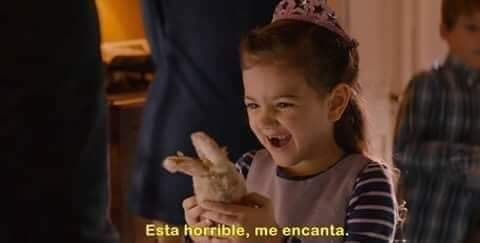

#### Aspectos importantes de los datos que recibimos
* `INMUEBLE` y `CLAVE_CT` parecen ser IDs, hay que verificar su integridad (que no sean cadenas de texto con espacios antes y después o cosas por el estilo).
* Misma revisión de integridad con otros campos de texto:
    * `RESPONSABLE`
    * `TURNO`
    * `NOMBRE_CT`
    * `DIRECTOR`
    * `NIVEL`
* Hay texto compuesto (que en su conjunto significa algo más allá de sus partes individuales como un nombre) en diversos campos. Hay que analizar qué nos sirve en cada uno. 
    * `BENEFICIARIOS_ALIMENTOS_DIF_2014`. 
        * Este incluso parece que puede tener variantes (ALIMENTO FRIO). 
    * `CONECTIVIDAD`
    * `OBSERVACION_*` 
        * Este tipo de campos tiene evidentes problemas con acentos.
* Los campos numéricos no son numéricos aunque lo parezcan. 
    * Tienen `$`, `,` y `.` que vuelven al número un texto de acuerdo a `pandas`. 
* Parece que nulos (sin valor o `NaN`) serán un problema.


## Análisis del estado: ¿Qué tenemos? 

#### Estadísticos básicas a analizar
* Media.
    * Promedio de los datos.
    * Es definido por $\bar{x} = \frac{1}{N}\sum_{i=0}^Nx_i$.
* Mediana o percentil 50.
    * Punto medio de los datos. En una distribución normal la media es igual a la mediana.
* Desviación estándar. 
    * Dispersión de los datos hacia la media.
    * Es definida por $\frac{1}{N}\sum_{i=0}^N(x_i - \bar{x})^2$.
* Percentiles.
    * Así como la mediana, es una medida de posición que nos indica el valor de los datos hasta cierto punto (25% de los datos, 50%, etc.).


#### Visualizaciones a graficar
* Histograma de los datos.
* Gráfica de frecuencias.
* Correlaciones.



##### Trabajando con columnas de dinero y sus caracteres especiales 
Hay columnas de dinero que vienen con caracteres como "$". Eso hace que se lean como objetos aunque sean números en realidad. 

In [8]:
# Vamos a identificar columans que tienen "$" usando list comprehension


# Línea en blanco






Veamos si funcionó 

Funcionó aunque siguen sin ser flotantes.

#####  Creando flotantes

Convertiremos columnas a números siempre que se pueda. 

Nos damos cuenta que en muchos casos hay la leyenda `could not convert string to float: ''`, por lo que habrá que lidiar con eso. 

In [9]:
exc = "could not convert string to float: ''"





#####  Reemplazando nulos 

En este set tenemos distintos datos como `N.A.` que son nulos pero por alguna razón no vienen así, hay que estandarizar eso también. Vimos algunos com `N.A.` pero hay que buscar por si hay otro tipo. 

Para nada es un método infalible ni mucho menos el único, es una técnica rápida para ver los menos y los más ocurrentes. 

En este caso no hay. 

La forma de reemplazar sería algo así: 

In [78]:
df.replace({'': None,
            '  -   ': None,
            '-': None,
            'N.A.': None,
            'S/D': None}, inplace=True)

### Visualización de estado

Hasta el momento hemos hecho una limpieza básica, es decir, cosas muy obvias (como el caso de `N.A.`) o el del tipo de dato. 

Necesitamos entender el estado de las demás columnas para ver qué tenemos y si hay algo más que podamos hacer o no. 


In [10]:
def get_numeric_stats(df):
    """
    Esta magia sacará estadísticas básicas DE LAS VARIABLES NUMÉRICAS.

    Parámetros
    ----------
    df: pandas.DataFrame
        Tabla con variables limpias.

    Regresa
    -------
    stats: diccionario
        Dict de la forma {columna: {nombre de la métrica: valor de la métrica}}
    """
    # Seleccionando las variables numéricas únicamente


    # Este va a ser el diccionario que regresaremos, lo llenaremos con un looop.


    # Recorramos las columnas

        # Obtengamos el promedio


        # Ahora la mediana


        # Ahora la desviación estándar


        # Obtengamos el primer y tercer cuartil

        # ¿Cuál es el porcentaje de nulos?

        # Guardemos
    return stats

In [11]:
def get_cat_stats(df):
    """
    Esta magia sacará estadísticas básicas DE LAS VARIABLES CATEGÓRICAS

    Parámetros
    ----------
    df: pandas.DataFrame
        Tabla con variables limpias.

    Regresa
    -------
    stats: diccionario
        Dict de la forma {columna: {nombre de la métrica: valor de la métrica}}
    """
    # Seleccionando los objetos


    # El dict que regresaremos


    # Recorramos las columnas

        # ¿Cuántos valores únicos hay?


        # Saquemos la "moda" (valor más común).
        # Para eso primero usamos value_counts para encontrar la frecuenc


        # Ahora sacaremos una tupla con el valor más común y el porcentaje de veces
        # que aparece

        # Cuenta de nulos

        # Stats a devolver

    return stats

In [81]:
# Algunas utilerías que vamos a usar
def autolabel(rects, ax):
    """
    Método auxiliar para agregarle el númerito correspondiente a su valor 
    a la barra en una gráfica de barras.
    
    Esta función no la hice yo (aunque sí la modifiqué). La origi está en:
    https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    rects: La figura de la gráfica guardada en una variable
    ax: El eje donde se está graficando.
    """
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,
                1.05*height,
                '%d'%int(height),
                ha='center', va='bottom')
        
def _get_colors_to_use(variables):
    """ Función para asignarle colores crecientes a una lista de elements
    
    Parámetros
    ----------
    variables: Lista de elementos a los cuales les queremos asignar color


    Regresa
    -------
    Dictionario de la forma: {element: color}
    """
    colors = plt.cm.jet(np.linspace(0, 1, len(variables)))
    return dict(zip(variables, colors))


def plot_numeric(df, numeric_stats):
    corr = df.select_dtypes(exclude=['object']).corr()

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.matshow(corr, cmap='Blues')

    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)

    ax.set_yticks(range(len(corr.columns)))
    ax.set_yticklabels(corr.columns)

    ax.grid(False)
    
    metrics = ['mean', 'median', 'std', 'q25', 'q75', 'nulls']
    colors = _get_colors_to_use(metrics)

    for index, variable in enumerate(sorted(numeric_stats.keys())):

        # Plotting basic metrics
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

        bar_position = -1
        for metric, value in numeric_stats[variable].items():
            bar_position += 1

            if value is None or np.isnan(value):
                value = -1

            # Plotting bars
            bar_plot = ax[0].bar(bar_position, value,
                                 label=metric, color=colors[metric])
            autolabel(bar_plot, ax[0])

            # Plotting histogram
            df[variable].plot(kind='hist', color='blue',
                              alpha=0.4, ax=ax[1])

            # Plotting boxplot
            df.boxplot(ax=ax[2], column=variable)

            ax[0].set_xticks(range(len(metrics)))
            ax[0].set_xticklabels(metrics, rotation=90)
            ax[2].set_xticklabels('', rotation=90)

            ax[0].set_title('\n Basic metrics \n', fontsize=10)
            ax[1].set_title('\n Data histogram \n', fontsize=10)
            ax[2].set_title('\n Data boxplot \n', fontsize=10)
            fig.suptitle(f'Variable: {variable} \n\n\n', fontsize=15)

            fig.tight_layout()
    return


def plot_categorical(df, object_stats):

    metrics = ['unique_vals', 'mode', 'null_count']
    colors = _get_colors_to_use(metrics)

    for index, variable in enumerate(sorted(object_stats.keys())):

        # Plotting basic metrics
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

        bar_position = -1
        for metric, value in object_stats[variable].items():
            bar_position += 1

            if metric == 'mode':
                mode = value[0]
                value = value[1]

            if value is None or np.isnan(value):
                value = -1

            bar_plot = ax.bar(bar_position, value,
                              label=metric, color=colors[metric])
            autolabel(bar_plot, ax)

        ax.set_xticks(range(len(metrics)))
        ax.set_xticklabels(metrics, rotation=90, fontsize=15)

        ax.set_title(
            f'\n Basic object metrics: {variable} \n Mode: {mode}\n',
            fontsize=15)

        fig.tight_layout()
    return

En este punto tenemos un dataset "limpio" para hacer una visualización y definir otro tipo de limpiezas necesarias. 


Guardemos para posteriormente hacer otro análisis.

Usemos nuestras funciones para obtener estadísticos básicos

Grafiquemos 

### Conclusión datos numéricos



### Conclusión datos categóricos
